In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('drugsCom_raw (1).tsv',sep='\t' )
df

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10.0,"May 31, 2015",125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1.0,"November 1, 2011",34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2.0,"March 15, 2014",35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10.0,"September 19, 2015",79


In [3]:
df.shape

(161297, 7)

In [4]:
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


In [6]:
df.isnull().sum()

Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

##Filter for Target Conditions

In [7]:
df['condition'] = df['condition'].str.strip()

In [8]:
df = df.dropna(subset=['condition'])

In [9]:
target_conditions = ['Depression', 'High Blood Pressure', 'Diabetes, Type 2']

In [10]:
df_filtered = df[df['condition'].isin(target_conditions)].copy()

In [11]:
df_filtered.reset_index(drop=True, inplace=True)

In [12]:
# Step 6: View the shape and sample
print("Filtered Dataset Shape:", df_filtered.shape)
print("\nSample Rows:")
print(df_filtered[['condition', 'review']].head())

Filtered Dataset Shape: (13944, 7)

Sample Rows:
          condition                                             review
0        Depression  "I have taken anti-depressants for years, with...
1        Depression  "1 week on Zoloft for anxiety and mood swings....
2        Depression  "my gp started me on Venlafaxine yesterday to ...
3  Diabetes, Type 2  "Hey Guys,  It&#039;s been 4 months since my l...
4        Depression  "This medicine saved my life. I was at my wits...


In [13]:
# Count of each condition
print(df_filtered['condition'].value_counts())

condition
Depression             9069
Diabetes, Type 2       2554
High Blood Pressure    2321
Name: count, dtype: int64


## Text Preprocessing

In [14]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK assets (only once)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ammia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ammia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ammia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ammia\AppData\Roaming\nltk_data...


True

In [15]:
# Initialize lemmatizer and stopwords
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # 1. Lowercase
    text = text.lower()

    # 2. Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # 3. Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # 4. Tokenize and remove stopwords
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]

    # 5. Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # 6. Join tokens back into string
    return ' '.join(tokens)

In [16]:
# Apply to the review column
df_filtered['cleaned_review'] = df_filtered['review'].apply(clean_text)

# Show before & after
print(df_filtered[['review', 'cleaned_review']].head(3))

                                              review  \
0  "I have taken anti-depressants for years, with...   
1  "1 week on Zoloft for anxiety and mood swings....   
2  "my gp started me on Venlafaxine yesterday to ...   

                                      cleaned_review  
0  taken antidepressant year improvement mostly m...  
1  week zoloft anxiety mood swing take mg morning...  
2  gp started venlafaxine yesterday help depressi...  


In [17]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK assets (only once)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab') # Download the missing 'punkt_tab' data

# Initialize lemmatizer and stopwords
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # 1. Lowercase
    text = text.lower()

    # 2. Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # 3. Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # 4. Tokenize and remove stopwords
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]

    # 5. Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # 6. Join tokens back into string
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ammia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ammia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ammia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ammia\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ammia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [18]:
# Apply to the review column
df_filtered['cleaned_review'] = df_filtered['review'].apply(clean_text)

# Show before & after
print(df_filtered[['review', 'cleaned_review']].head(3))

                                              review  \
0  "I have taken anti-depressants for years, with...   
1  "1 week on Zoloft for anxiety and mood swings....   
2  "my gp started me on Venlafaxine yesterday to ...   

                                      cleaned_review  
0  taken antidepressant year improvement mostly m...  
1  week zoloft anxiety mood swing take mg morning...  
2  gp started venlafaxine yesterday help depressi...  


## Label Encoding the Target (Condition)

In [19]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Fit and transform the target labels
df_filtered['label'] = label_encoder.fit_transform(df_filtered['condition'])

# Check mapping
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

# Preview with labels
df_filtered[['condition', 'label']].head()

Label Mapping: {'Depression': np.int64(0), 'Diabetes, Type 2': np.int64(1), 'High Blood Pressure': np.int64(2)}


,condition,label
0,Depression,0
1,Depression,0
2,Depression,0
3,"Diabetes, Type 2",1
4,Depression,0


## Convert Cleaned Text into Features (Vectorization)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # You can increase this if needed

# Fit and transform the cleaned review text
X = tfidf.fit_transform(df_filtered['cleaned_review'])

# Target labels
y = df_filtered['label']

# Check shape
print("TF-IDF Shape:", X.shape)

TF-IDF Shape: (13944, 5000)


## Build and Train a Classification Model

In [21]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])

Training Samples: 11155
Testing Samples: 2789


In [22]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [23]:
from sklearn.metrics import accuracy_score

# Predict on test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9541054141269272


In [24]:
import joblib

# Save the model and vectorizer
joblib.dump(model, 'condition_classifier_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

| Metric               | Purpose                                 |
| -------------------- | --------------------------------------- |
| **Accuracy**         | Overall correctness                     |
| **Precision**        | Correctness of positive predictions     |
| **Recall**           | Ability to capture all actual positives |
| **F1-Score**         | Balance between precision & recall      |
| **Confusion Matrix** | Visualize performance per class         |

In [25]:
from sklearn.metrics import classification_report

# Show precision, recall, f1-score for each class
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

                     precision    recall  f1-score   support

         Depression       0.95      0.99      0.97      1800
   Diabetes, Type 2       0.97      0.92      0.95       501
High Blood Pressure       0.95      0.85      0.90       488

           accuracy                           0.95      2789
          macro avg       0.96      0.92      0.94      2789
       weighted avg       0.95      0.95      0.95      2789



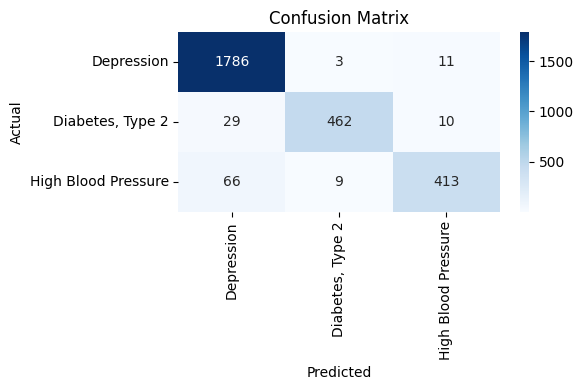

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [ ]:
streamlit
scikit-learn
joblib
nltk